**2) [20 points] Implement the model and plot two curves in one figure: i) training loss vs.
training iterations; ii) test loss vs. training iterations.**


*   **You can use online code. However, you must reference (cite) the code in your answer.**
*   **Submission includes the plot of the two curves and a link to the runnable code in your Github account (in the Github, you need to write a ReadMe file containing instructions on how to run the code).**
*    **You can use any packages, but Pytorch is recommended.** 





In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Load the MNIST dataset and preprocess the data

train_data = MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./data', train=False, download=True, transform=ToTensor())
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.Softmax(dim=1)
).to(device)

In [5]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

In [6]:
train_loss_history = []
test_loss_history = []

In [7]:
for epoch in range(25):
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss_history.append(train_loss / len(train_loader.dataset))
    
    test_loss = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_function(output, target)
            test_loss += loss.item() * data.size(0)
    test_loss_history.append(test_loss / len(test_loader.dataset))
    
    print(f'Epoch {epoch+1}/{25}: Train Loss: {train_loss_history[-1]:.6f} | Test Loss: {test_loss_history[-1]:.6f}')



Epoch 1/25: Train Loss: 1.647917 | Test Loss: 1.543769
Epoch 2/25: Train Loss: 1.533134 | Test Loss: 1.523793
Epoch 3/25: Train Loss: 1.517647 | Test Loss: 1.515686
Epoch 4/25: Train Loss: 1.509654 | Test Loss: 1.510280
Epoch 5/25: Train Loss: 1.503369 | Test Loss: 1.503275
Epoch 6/25: Train Loss: 1.497790 | Test Loss: 1.499248
Epoch 7/25: Train Loss: 1.493618 | Test Loss: 1.496686
Epoch 8/25: Train Loss: 1.489761 | Test Loss: 1.501573
Epoch 9/25: Train Loss: 1.487193 | Test Loss: 1.494076
Epoch 10/25: Train Loss: 1.484465 | Test Loss: 1.492758
Epoch 11/25: Train Loss: 1.482656 | Test Loss: 1.495402
Epoch 12/25: Train Loss: 1.480680 | Test Loss: 1.489396
Epoch 13/25: Train Loss: 1.479336 | Test Loss: 1.489516
Epoch 14/25: Train Loss: 1.477626 | Test Loss: 1.488046
Epoch 15/25: Train Loss: 1.476728 | Test Loss: 1.490214
Epoch 16/25: Train Loss: 1.476217 | Test Loss: 1.487072
Epoch 17/25: Train Loss: 1.475136 | Test Loss: 1.488603
Epoch 18/25: Train Loss: 1.474291 | Test Loss: 1.486310
E

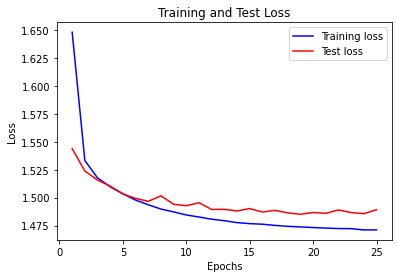

In [11]:
epochs = range(1, len(train_loss_history) + 1)

plt.plot(epochs, train_loss_history, label='Training loss', color = 'blue')
plt.plot(epochs, test_loss_history, label='Test loss', color = 'red')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()